# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №4 - Метод k-средних, предобработка признаков


###### <hr\>
**Общая информация**

**Срок сдачи:** 28 ноября 2018, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 28 ноября, -4 балла после 06:00 5 декабря, -6 баллов после 06:00 12 декабря, -8 баллов после 19 декабря

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

# Имплементация K-means

Пользуясь наработками выше, имплементируйте метод k-means.  
При инициализации необходимо задавать количество кластеров, функцию расстояния между кластерами (для оригинального k-means - евклидово расстояние) и начальное состояние генератора случайных чисел.

После обучения, среди атрибутов класса `Kmeans` должны появится
* Метки кластеров для объектов
* Координаты центройдов кластеров

k-means - это алгоритм **кластеризации**, а не классификации, а посему метод `.predict()` в нем фактически не нужен, но он может возвращать метки ближайшего кластера для объектов.

###### Задание 1 (2 баллов)
Имплементируйте метод k-means. Задание считается выполненным, если Ваша реализация работает быстрее реализации из sklearn.

Теория для выполнения задания 2 и 3 остаётся на самостоятельное изучение. Теории немного и она совсем простая.

###### Задание 2 (2 балла)
Имплементируйте класс MiniBatchKMeans, который является классом наследником Kmeans.

###### Задание 3 (2 балла)
Превратите k-means в k-means++. Для этого нужно реализовать метод в классе Kmeans, который будет инициализировать более "хорошие" значения центроидов. Чтобы использовался метод k-means++, в параметр init необходимо передать строковое значение 'k-means' (по умолчанию 'random').

###### Задание 4 (2 балла)
В пункте "Проверка корректности метода" нужно нарисовать графики, которые показывают зависимость времени выполнения алгоритма от количества сэмплов. Графики должны быть  нарисованы для различных комбинаций реализаций алгоритма (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). График достаточно построить на 5-10 точках.

###### Задание 5 (2 балла)
В пункте "Применение K-means на реальных данных" нужно сравнить различные реализации k-means (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). После чего написать вывод, в котором должно быть объяснение того, почему один алгоритм оказался лучше остальных или почему не было выявлено лучшего алгоритма.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw4.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from  more_itertools import unique_everseen
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import pairwise_distances
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

%load_ext pycodestyle_magic

In [2]:
#%%pycodestyle


class MyKmeans:

    def __init__(self, k=2, metric='euclidean',
                 max_iter=1000, random_state=None, init='random'):
        """
        Инициализация метода
        :k - количество кластеров
        :metric - функция расстояния между объектами
        :max_iter - максиальное количество итераций
        :random_state - seed для инициализации генератора случайных чисел
        """

        self.k = k
        self.random_state = random_state
        self.metric = metric
        self.max_iter = max_iter
        self.init = init

    def fit(self, X, y=None):
        """
        Процедура обучения k-means
        """
        self.X = X
        # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)
        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(self.X.shape[0])
        # Массив с центройдами кластеров
        self.centroids = np.empty((self.k, self.X.shape[1]))
        # Your Code Here
        # ...
        if self.init == 'random':
            initial = np.random.randint(0, self.X.shape[0], self.k)
            self.centroids = self.X[initial]
        if self.init == 'kek':
            initial = np.mean(self.X, axis=0)
            self.centroids = initial + np.random.sample((self.k,
                                                         self.X.shape[1]))
        if self.init == 'k-means':
            self.centroids[0] = self.X[np.random.randint(0, self.X.shape[0])]
            for i in range(1, self.k):
                min_dist = np.min(pairwise_distances(self.X,
                                                     self.centroids[:i],
                                                     self.metric), axis=1) ** 2
                distribution = min_dist / np.sum(min_dist)
                self.centroids[i] = self.X[np.random.choice(
                    range(X.shape[0]), p=distribution)]
        flag, steps = 1, 1
        while(steps <= self.max_iter):
            prev_centr = np.array(self.centroids)
            self.labels = self.set_labels(self.X, self.centroids, self.metric)
            self.set_centroids(self.centroids, self.X, self.labels)
            if(np.all(prev_centr == self.centroids)):
                break
            steps += 1
        return self

    def set_labels(self, A, B, C):
        dist = pairwise_distances(A, B, metric=C)
        return np.argmin(dist, axis=1)

    def set_centroids(self, centr, data, label):
        for i in range(0, len(centr)):
            ind = (np.where(label == i)[0]).tolist()
            if(len(ind) != 0):
                centr[i] = np.mean(data[ind], axis=0)

    def predict(self, X, y=None):
        """
        Процедура предсказания кластера
        Возвращает метку ближайшего кластера для каждого объекта
        """
        count = 0
        label_temp = np.zeros(len(self.labels))
        label_unic = np.array(list(unique_everseen(self.labels)), dtype=int)
        for i in label_unic:
            array = np.where(self.labels == i)
            for k in array[0]:
                label_temp[k] = count
            count += 1
        return label_temp

    def score(self, X, y):
        return accuracy_score(y, self.predict(X))


class MiniBatchKMeans(MyKmeans):

    def __init__(self, k=2, metric='euclidean', batch_size=100,
                 max_iter=1000, random_state=None, init='random'):
        super(MiniBatchKMeans, self).__init__(
            k, metric, max_iter, random_state, init)
        self.batch_size = batch_size

    def fit(self, X, y=None):
        self.X = X
        self.labels = np.empty(self.X.shape[0])
        self.centroids = np.empty((self.k, X.shape[1]))
        if self.init == 'random':
            initial = np.random.randint(0, self.X.shape[0], self.k)
            self.centroids = self.X[initial]
        if self.init == 'kek':
            initial = np.mean(self.X, axis=0)
            self.centroids = initial + np.random.sample(
                (self.k, self.X.shape[1]))
        if self.init == 'k-means':
            self.centroids[0] = self.X[np.random.randint(0, self.X.shape[0])]
            for i in range(1, self.k):
                min_dist = np.min(pairwise_distances(
                    self.X, self.centroids[:i],
                    self.metric), axis=1) ** 2
                distribution = min_dist / np.sum(min_dist)
                self.centroids[i] = self.X[np.random.choice(
                    range(self.X.shape[0]),
                    p=distribution)]

        self.labels = self.set_labels(self.X, self.centroids, self.metric)
        steps = 1
        while(steps <= self.max_iter):
            prev_centr = np.array(self.centroids)
            mini_batch = np.random.permutation(
                self.X.shape[0])[:self.batch_size]
            self.labels[mini_batch] = self.set_labels(
                self.X[mini_batch], self.centroids, self.metric)
            value_count = np.zeros(self.X.shape[0])
            for i in mini_batch:
                value_count[self.labels[i]] += 1
                v_c = value_count[self.labels[i]]
                self.centroids[self.labels[i]] = (
                    self.centroids[self.labels[i]]*(1 - 1 / v_c)
                    + self.X[i] * (1 / v_c))
                if(np.all(prev_centr == self.centroids)):
                    break
                steps += 1
        self.labels = self.set_labels(self.X, self.centroids, self.metric)
        return self

### Проверка корректности метода

Перед тем как применять алгоритм на реальных данных, нужно испытать его на простых "игрушечных" данных.

Если алгоритм реализован правильно, то метод должен идеально разбивать на 3 кластера данные ниже. Проверьте это.

ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [3]:
from sklearn.datasets import make_blobs

In [4]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)

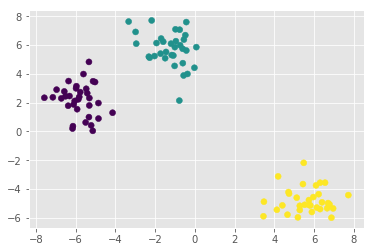

In [5]:
plt.scatter(X[:,0], X[:, 1], c=y)

Проверьте Вашу имплементацию на простых данных (без этого пункта ДЗ не считается выполненным).   
КОММЕНТАРИИ НЕ СТИРАТЬ!

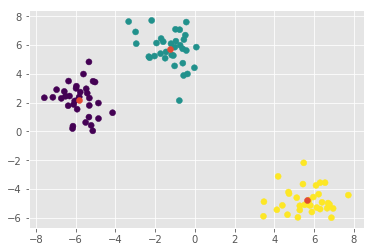

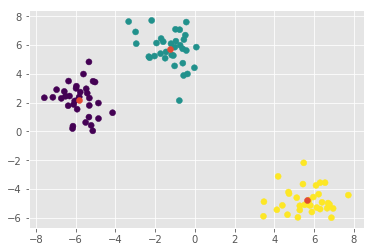

In [6]:
## Работоспособность MyKmeans
for i in range(2):
    my_clust = MyKmeans(k=3, init="random")
    my_clust.fit(X)
    plt.scatter(X[:,0], X[:, 1], c=my_clust.predict(X))
    plt.scatter(my_clust.centroids[:, 0], my_clust.centroids[:, 1])
    plt.show()

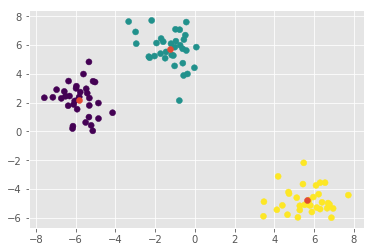

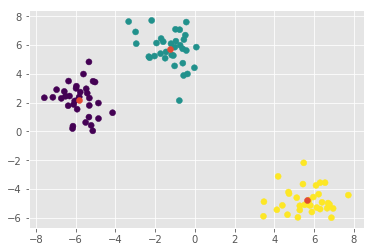

In [7]:
## Работоспособность MyKmeans++
for i in range(2):
    my_clust = MyKmeans(k=3, init="k-means")
    my_clust.fit(X)    
    plt.scatter(X[:,0], X[:, 1], c=my_clust.predict(X))
    plt.scatter(my_clust.centroids[:, 0], my_clust.centroids[:, 1])
    plt.show()

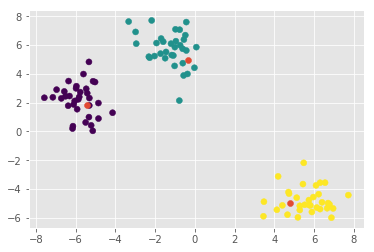

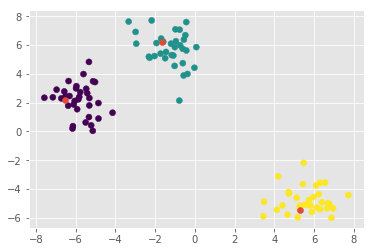

In [8]:
## Работоспособность MyKmeans с MiniBatchMyKmeans
for _ in range(2):
    my_clust = MiniBatchKMeans(k=3, init="random", batch_size=10).fit(X)
    plt.scatter(X[:,0], X[:, 1], c=my_clust.predict(X))
    plt.scatter(my_clust.centroids[:, 0], my_clust.centroids[:, 1])
    plt.show()

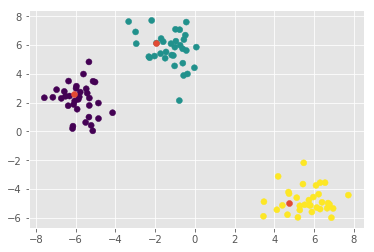

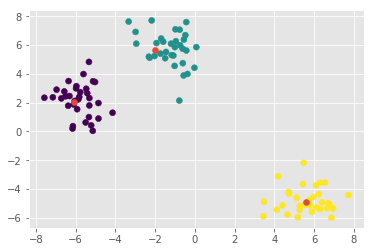

In [9]:
## Работоспособность MyKmeans++ с MiniBatchMyKmeans
for _ in range(2):
    my_clust = MiniBatchKMeans(k=3, init="k-means", batch_size=10).fit(X)
    plt.scatter(X[:,0], X[:, 1], c=my_clust.predict(X))
    plt.scatter(my_clust.centroids[:, 0], my_clust.centroids[:, 1])
    plt.show()

In [10]:
## Время выполнения алгоритма Kmeans из sklearn
clust = KMeans(n_clusters=3, init = "random", max_iter=1000)
%time clust.fit(X)

Wall time: 36 ms


KMeans(algorithm='auto', copy_x=True, init='random', max_iter=1000,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
## Время выполнения алгоритма MyKmeans
my_clust = MyKmeans(k = 3, init="random")
%time my_clust.fit(X)

Wall time: 6 ms


In [12]:
## Время выполнения алгоритма MyKmeans++
my_clust = MyKmeans(k = 3, init="k-means")
%time my_clust.fit(X)

Wall time: 3 ms


In [13]:
## Время выполнения алгоритма MyKmeans с MiniBatchMyKmeans
my_clust = MiniBatchKMeans(k = 3, init="random", batch_size=10)
%time my_clust.fit(X)

Wall time: 77 ms


In [14]:
## Время выполнения алгоритма  MyKmeans++ с MiniBatchMyKmeans
my_clust = MiniBatchKMeans(k = 3, init="k-means", batch_size=10)
%time my_clust.fit(X)

Wall time: 85 ms


In [15]:
my_clust = MiniBatchKMeans(k = 3, init="kek", batch_size=10)
%time my_clust.fit(X)

Wall time: 84 ms


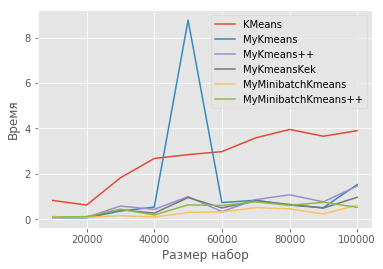

In [16]:
import time
rand = 10
number = 10
clust = [[KMeans(n_clusters=3, max_iter=1000, random_state=rand),
        MyKmeans(k=3, init='random', random_state=rand),
        MyKmeans(k=3, init='k-means', random_state=rand),
        MyKmeans(k=3, init='kek', random_state=rand),
        MiniBatchKMeans(k=3, init='random', random_state=rand),
        MiniBatchKMeans(k=3, init='k-means', random_state=rand)],
        ['KMeans', 'MyKmeans', 'MyKmeans++','MyKmeansKek', 
             'MyMinibatchKmeans', 'MyMinibatchKmeans++']]
check_set = np.linspace(10000, 100000, number, dtype=int)
fit_time = np.zeros((len(clust[0]), number))
x = np.zeros(number)

for ind, n in enumerate(check_set):
    X, y = make_blobs(n_samples=int(n), n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=10)
#     ft = np.zeros(len(clust[0]))
    for c, k in enumerate(clust[0]):
        curr_time = time.time()
        clust[0][c].fit(X)
        fit_time[c][ind] = (time.time() - curr_time)
for i, _ in enumerate(clust[0]):
    plt.plot(check_set.tolist(), fit_time[i], label=clust[1][i])
plt.xlabel('Размер набор')
plt.ylabel('Время')
plt.legend()
plt.show()

# Применение K-means на реальных данных

Загрузите [данные](https://github.com/brenden17/sklearnlab/blob/master/facebook/snsdata.csv) в которых содержится описание интересов профилей учеников старшей школы США.  (без этого пункта задание не считается выполненным).   
ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [17]:
df_sns = pd.read_csv('snsdata.csv', sep=',')
df_sns.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


Данные устроены так: 
* Год выпуска
* Пол
* Возраст
* Количество друзей
* 36 ключевых слов, которые встречаются в профилe facebook (интересы, сообщества, встречи)

* Удалите все признаки кроме 36 ключевых слов.
* Нормализуйте данные - из каждого столбца вычтите его среднее значение и поделите на стандартное отклонение.
* Используйте метод k-means чтобы выделить 9 кластеров
* Попробуйте проинтерпретировать каждый кластер проанализировав полученные центройды (Некоторые кластеры могут быть очень большие и очень маленькие - плохо интерпретируются)   
КОММЕНТАРИИ НЕ СТИРАТЬ!

In [18]:
df_new_sns = df_sns.drop(df_sns.columns[[0, 1, 2, 3]], axis=1)
df_new_sns.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [19]:
df_norm = (df_new_sns - df_new_sns.mean()) / (df_new_sns.std())

In [20]:
n = np.array(df_norm)

In [21]:
def clusters(kmean, data, Max):
    %time kmean.fit(data)
    labels = kmean.predict(data)
    df_sns.loc[:, 'label'] = labels
    for c, group in df_sns.groupby('label'):
        print('Кластер: {}'.format(int(c)+1))
        print('Число участников: {}'.format(list(kmean.labels).count(c)))
        print(group.iloc[:, 4:-1].mean().nlargest(Max))
        print('=' * 10 + '\n')

In [22]:
## MyKMeans
clusters(MyKmeans(k = 9, init = "random", random_state=10), n, 5)

Wall time: 10.9 s
Кластер: 1
Число участников: 680
music       0.574780
god         0.325333
dance       0.252491
hair        0.211996
shopping    0.200265
dtype: float64

Кластер: 2
Число участников: 20373
dance       1.298336
shopping    1.151891
music       1.083207
cute        1.030862
mall        0.890772
dtype: float64

Кластер: 3
Число участников: 652
hair      3.288725
sex       2.598525
music     2.257113
kissed    1.719705
die       1.279241
dtype: float64

Кластер: 4
Число участников: 2304
basketball    1.430556
football      1.340712
music         0.802951
baseball      0.750000
volleyball    0.660590
dtype: float64

Кластер: 5
Число участников: 497
cheerleading    2.924847
shopping        0.716258
music           0.696319
dance           0.631902
hair            0.538344
dtype: float64

Кластер: 6
Число участников: 949
band        4.109395
marching    1.386100
music       1.232947
god         0.512227
dance       0.465894
dtype: float64

Кластер: 7
Число участников: 777
so

1. Малый класс обычных людей
2. Возможно подростки
3. С суицидальными наклонностями 
4. Спортсмены
5. Девушки
6. Музыканты
7. Обычные люди
8. Религиозная группа
9. Спортсмены

In [23]:
## MyKMeans++
clusters(MyKmeans(k = 9, init = "k-means", random_state=10), n, 5)

Wall time: 6.51 s
Кластер: 1
Число участников: 703
music       0.528470
god         0.280338
dance       0.226065
hair        0.189786
shopping    0.176545
dtype: float64

Кластер: 2
Число участников: 20618
music       1.219964
god         1.039927
dance       1.019601
shopping    0.849183
cute        0.753176
dtype: float64

Кластер: 3
Число участников: 641
hair      2.771946
sex       1.916742
music     1.839819
kissed    1.431674
die       1.160181
dtype: float64

Кластер: 4
Число участников: 1
hollister      1.508939
abercrombie    1.164482
hair           0.928486
shopping       0.914184
music          0.890346
dtype: float64

Кластер: 5
Число участников: 5510
cheerleading    2.936037
shopping        0.725429
music           0.691108
dance           0.636505
god             0.558502
dtype: float64

Кластер: 6
Число участников: 839
soccer        4.879090
music         0.766714
shopping      0.499289
god           0.455192
basketball    0.449502
dtype: float64

Кластер: 7
Число участ

1. Малый класс обычных людей
2. Слишком большой класс
3. С суицидальными наклонностями 
4. -
5. Девушки
6. Обычные люди
7. Спортсмены
8. Панки
9. Анимешники

In [24]:
## MyKMeans с MiniBatchMyKMeans
clusters(MiniBatchKMeans(k = 9, init = "random", random_state=10), n, 5)

Wall time: 272 ms
Кластер: 1
Число участников: 20
music       0.720600
god         0.457159
dance       0.416088
hair        0.391010
shopping    0.344154
dtype: float64

Кластер: 2
Число участников: 8
softball      5.695876
basketball    3.056701
band          1.123711
music         0.943299
sports        0.798969
dtype: float64

Кластер: 3
Число участников: 29388
hot      3.194444
cute     2.766667
hair     2.161111
music    1.450000
dance    1.105556
dtype: float64

Кластер: 4
Число участников: 109
band        3.779817
swimming    3.550459
marching    1.871560
music       1.431193
god         0.697248
dtype: float64

Кластер: 5
Число участников: 74
hair      5.337838
sex       3.378378
soccer    3.351351
music     2.864865
die       2.662162
dtype: float64

Кластер: 6
Число участников: 7
blonde     43.375
hair       16.250
sex        10.625
music      10.000
clothes     4.250
dtype: float64

Кластер: 7
Число участников: 194
death    10.285714
god       3.000000
dance     1.857143
di

Сложно что-либо сказать, неудачная кластеризация

In [27]:
## MyKMeans++ с MiniBatchMyKMeans
clusters(MiniBatchKMeans(k = 9, init = "k-means", random_state=10), n, 5)

Wall time: 536 ms
Кластер: 1
Число участников: 79
music       0.707192
god         0.450828
dance       0.407011
hair        0.383607
shopping    0.334713
dtype: float64

Кластер: 2
Число участников: 35
volleyball    4.210046
music         0.716895
basketball    0.675799
shopping      0.673516
softball      0.648402
dtype: float64

Кластер: 3
Число участников: 28756
band            8.277778
marching        2.000000
music           1.750000
cheerleading    0.738889
dance           0.672222
dtype: float64

Кластер: 4
Число участников: 180
hollister      2.866667
hair           2.080000
abercrombie    1.673333
music          1.520000
shopping       1.140000
dtype: float64

Кластер: 5
Число участников: 438
hot           1.888889
music         1.805556
rock          1.772222
hair          1.655556
basketball    1.544444
dtype: float64

Кластер: 6
Число участников: 1
sexy     5.822785
music    1.443038
cute     1.278481
dance    1.265823
sex      1.126582
dtype: float64

Кластер: 7
Число уча

Аналогично, как и с random

In [28]:
## Вывод

Minibatch с параметром random и minibatch  с параметром k-means проявили себя неплохо на игрушечных данных, но показывают крайне некачественный результат на реальных данных. В среднем KMeans++ рабоает достаточно стабильно по сравнению с обычным, при этом несколько быстрее. Интересно заметить, что метод с параметром инициализации 'kek' работает почти также, как и kmeans++. На реальных данных minibatch сильно выигрывает в скорости, в то время как другие реализации примерно равны.